In [1]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import psycopg2
import sqlalchemy

In [2]:
# Import Username, Passwrd and Database Name 
from config import pg_ipaddress, pg_port, pg_username, pg_password, pg_dbname

In [3]:
# Setup connection with Postgres
from sqlalchemy import create_engine
postgres_str = ('postgresql://{username}:{password}@{ipaddress}:{port}/{dbname}'
                .format(username=pg_username,
                       password=pg_password,
                       ipaddress=pg_ipaddress,
                       port=pg_port,
                       dbname=pg_dbname))

connection = create_engine(postgres_str)

In [4]:
employees_df = pd.read_sql("select * from employees", connection)
employees_df.fillna("NaN")

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date
0,473302,s0001,7/25/1953,Hideyuki,Zallocco,M,4/28/1990
1,475053,e0002,11/18/1954,Byong,Delgrande,F,9/7/1991
2,57444,e0002,1/30/1958,Berry,Babb,F,3/21/1992
3,421786,s0001,9/28/1957,Xiong,Verhoeff,M,11/26/1987
4,282238,e0003,10/28/1952,Abdelkader,Baumann,F,1/18/1991
...,...,...,...,...,...,...,...
300019,464231,s0001,8/14/1958,Constantino,Eastman,M,10/28/1988
300020,255832,e0002,5/8/1955,Yuping,Dayang,F,2/26/1995
300021,76671,s0001,6/9/1959,Ortrud,Plessier,M,2/24/1988
300022,264920,s0001,9/22/1959,Percy,Samarati,F,9/8/1994


In [5]:
# Create a histogram to visualize the most common salary ranges for employees
salaries_df = pd.read_sql("select * from salaries", connection)
salaries_df.fillna("NaN")

,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228
...,...,...
300019,499995,40000
300020,499996,58058
300021,499997,49597
300022,499998,40000


In [6]:
salaries_df["salary"].min()

40000

In [7]:
salaries_df["salary"].max()

129492

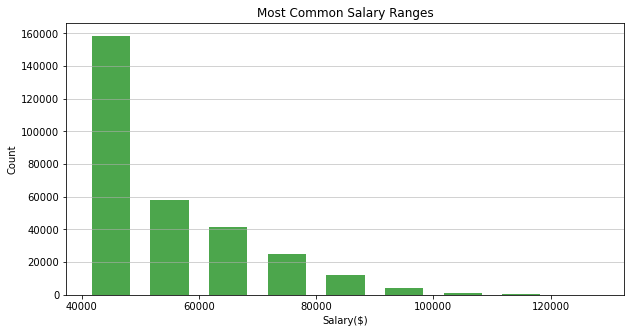

In [8]:
plt.figure(figsize=(10,5))
bins = [40000, 50000, 60000, 70000, 80000, 90000, 100000, 110000, 120000, 130000]
n, bins, patches = plt.hist(x=salaries_df["salary"], bins = bins, color = 'g', alpha=0.7, rwidth=0.65)
plt.grid(axis='y', alpha=0.7)
plt.xlabel('Salary($)')
plt.ylabel('Count')
plt.title('Most Common Salary Ranges')
plt.show()

In [9]:
# Create bar chart of average salary by title
titles_df = pd.read_sql("select * from titles", connection)
titles_df.fillna("NaN")

,title_id,title
0,s0001,Staff
1,s0002,Senior Staff
2,e0001,Assistant Engineer
3,e0002,Engineer
4,e0003,Senior Engineer
5,e0004,Technique Leader
6,m0001,Manager


In [10]:
emp_sal_df = pd.merge(employees_df, salaries_df, on = "emp_no")
emp_sal_df

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date,salary
0,473302,s0001,7/25/1953,Hideyuki,Zallocco,M,4/28/1990,40000
1,475053,e0002,11/18/1954,Byong,Delgrande,F,9/7/1991,53422
2,57444,e0002,1/30/1958,Berry,Babb,F,3/21/1992,48973
3,421786,s0001,9/28/1957,Xiong,Verhoeff,M,11/26/1987,40000
4,282238,e0003,10/28/1952,Abdelkader,Baumann,F,1/18/1991,40000
...,...,...,...,...,...,...,...,...
300019,464231,s0001,8/14/1958,Constantino,Eastman,M,10/28/1988,69696
300020,255832,e0002,5/8/1955,Yuping,Dayang,F,2/26/1995,75355
300021,76671,s0001,6/9/1959,Ortrud,Plessier,M,2/24/1988,61886
300022,264920,s0001,9/22/1959,Percy,Samarati,F,9/8/1994,62772
